# Small Oscillations Double Pendulum

##Preamble

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import os
import subprocess
from IPython.display import Image

Symbolic variables

In [2]:
t,l1,l2,m1,m2,g=sp.symbols('t,l1,l2,m1,m2,g',positive=True)

Generalized coordinates

In [3]:
phi1,phi2=sp.Function('phi1')(t),sp.Function('phi2')(t)

Cartesian Coordinates

In [4]:
x1=l1*sp.sin(phi1)
x2=l1*sp.sin(phi1)+l2*sp.sin(phi2)
y1=l1*sp.cos(phi1)
y2=l1*sp.cos(phi1)+l2*sp.cos(phi2)

Cartesian velocities

In [5]:
dot_x1=x1.diff(t)
dot_y1=y1.diff(t)
dot_x2=x2.diff(t)
dot_y2=y2.diff(t)

## Kinetic Energy $T$

In [6]:
T=sp.simplify(sp.Rational(1,2)*m1*(dot_x1**2+ dot_y1**2)+sp.Rational(1,2)*m2*(dot_x2**2+ dot_y2**2))
T

l1**2*m1*Derivative(phi1(t), t)**2/2 + m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)/2

## Potential Energy $U$ (notice that $y$ increases downwards)

In [7]:
U=(-m1*g*y1-m2*g*y2).simplify()
U

-g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t)))

## Lagrangian $L=T-U$

In [8]:
Lag=(T-U).simplify()
Lag

g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t))) + l1**2*m1*Derivative(phi1(t), t)**2/2 + m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)/2

## For simplicity we take $l_1=l_2=l$, $m_1=m_2=m$

In [9]:
l,m=sp.symbols('l,m', positive=True)

## Inertia Tensor

In [10]:
dot_phi=(phi1.diff(t),phi2.diff(t))
M0=sp.zeros(len(dot_phi))
for i in range(len(dot_phi)):
  for j in range(len(dot_phi)):
    M0[i,j]=sp.simplify((T.diff(dot_phi[i])).diff(dot_phi[j])).subs([(phi1,0),(phi2,0)])
M0

Matrix([
[l1**2*(m1 + m2), l1*l2*m2],
[       l1*l2*m2, l2**2*m2]])

In [11]:
M=M0.subs([(l1,l),(l2,l),(m1,m),(m2,m)])
M

Matrix([
[2*l**2*m, l**2*m],
[  l**2*m, l**2*m]])

## Harmonic Tensor

In [12]:
phi=(phi1,phi2)
K0=sp.zeros(len(phi))
for i in range(len(phi)):
  for j in range(len(phi)):
    K0[i,j]=sp.simplify((U.diff(phi[i])).diff(phi[j])).subs([(phi1,0),(phi2,0)])
K0

Matrix([
[g*l1*(m1 + m2),       0],
[             0, g*l2*m2]])

In [13]:
K=K0.subs([(l1,l),(l2,l),(m1,m),(m2,m)])
K

Matrix([
[2*g*l*m,     0],
[      0, g*l*m]])

In this case, the harmonic tensor is already diagonal. Thus we can use it to perform the scale transformation that reshapes it into the unit matrix, and apply the same transformation to the inertia tensor.

In [14]:
MK=sp.simplify(sp.sqrt(K)**(-1)*M*sp.sqrt(K)**(-1))
MK

Matrix([
[            l/g, sqrt(2)*l/(2*g)],
[sqrt(2)*l/(2*g),             l/g]])

Diagonalization $T^{-1} M_K T=M_{KD}$

In [15]:
T,MKD= MK.diagonalize()

Orthonormalization

In [16]:
OMK=sp.simplify(T*(sp.sqrt((sp.Transpose(T)*T))**(-1)))
OMK

Matrix([
[-sqrt(2)/2, sqrt(2)/2],
[ sqrt(2)/2, sqrt(2)/2]])

Verification of orthonormality and diagonalization

In [17]:
sp.simplify(sp.Transpose(OMK)*OMK)

Matrix([
[1, 0],
[0, 1]])

In [18]:
sp.simplify(sp.Transpose(OMK)*MK*OMK-MKD)

Matrix([
[0, 0],
[0, 0]])

Finally, the diagonal matrix of squared eigenfrequencies is the inverse of $M_{KD}$

In [19]:
WD=(MKD)**(-1)
WD

Matrix([
[g/(l*(1 - sqrt(2)/2)),                     0],
[                    0, g/(l*(sqrt(2)/2 + 1))]])

Modal Matrix

In [20]:
S=sp.simplify(sp.sqrt(K)**(-1)*OMK*sp.sqrt(MKD)**(-1))
S

Matrix([
[-sqrt(2)/(2*l*sqrt(m)*sqrt(2 - sqrt(2))), sqrt(2)/(2*l*sqrt(m)*sqrt(sqrt(2) + 2))],
[         1/(l*sqrt(m)*sqrt(2 - sqrt(2))),         1/(l*sqrt(m)*sqrt(sqrt(2) + 2))]])

Normal Coordinates

In [21]:
NC=(S**(-1))*sp.Matrix([[phi1],[phi2]])
NC

Matrix([
[(-sqrt(2)*l*sqrt(m) + l*sqrt(m))*phi1(t)/sqrt(2 - sqrt(2)) + (-sqrt(2)*l*sqrt(m) + 2*l*sqrt(m))*phi2(t)/(2*sqrt(2 - sqrt(2)))],
[                                        sqrt(2)*l*sqrt(m)*sqrt(sqrt(2) + 2)*phi1(t)/2 + l*sqrt(m)*sqrt(sqrt(2) + 2)*phi2(t)/2]])

General Solution for the Angles

In [22]:
A1,A2,B1,B2=sp.symbols('A1,A2,B1,B2')

In [23]:
phi_sol=sp.simplify(S*sp.Matrix([[A1*sp.cos(WD[0,0]*t)+B1*sp.sin(WD[0,0]*t)],[A2*sp.cos(WD[1,1]*t)+B2*sp.sin(WD[1,1]*t)]]))
phi_sol

Matrix([
[       (-sqrt(sqrt(2) + 2)*(A1*cos(2*g*t/(l*(2 - sqrt(2)))) + B1*sin(2*g*t/(l*(2 - sqrt(2))))) + sqrt(2 - sqrt(2))*(A2*cos(2*g*t/(l*(sqrt(2) + 2))) + B2*sin(2*g*t/(l*(sqrt(2) + 2)))))/(2*l*sqrt(m))],
[sqrt(2)*(sqrt(sqrt(2) + 2)*(A1*cos(2*g*t/(l*(2 - sqrt(2)))) + B1*sin(2*g*t/(l*(2 - sqrt(2))))) + sqrt(2 - sqrt(2))*(A2*cos(2*g*t/(l*(sqrt(2) + 2))) + B2*sin(2*g*t/(l*(sqrt(2) + 2)))))/(2*l*sqrt(m))]])

In [24]:
phi1_0,phi2_0,dot_phi1_0, dot_phi2_0=sp.symbols(r'\phi_1^0,\phi_2^0,\dot{\phi}_1^0, \dot{\phi}_2^0')

In [25]:
sols_A=sp.solve([sp.Eq(phi_sol[0].subs(t,0),phi1_0),sp.Eq(phi_sol[1].subs(t,0),phi2_0)],[A1,A2])
sols_A

{A1: -\phi_1^0*l*sqrt(m)/sqrt(sqrt(2) + 2) + sqrt(2)*\phi_2^0*l*sqrt(m)/(2*sqrt(sqrt(2) + 2)),
 A2: \phi_1^0*l*sqrt(m)/sqrt(2 - sqrt(2)) + sqrt(2)*\phi_2^0*l*sqrt(m)/(2*sqrt(2 - sqrt(2)))}

In [26]:
dot_phi_sol=phi_sol.diff(t)
dot_phi_sol

Matrix([
[       (-sqrt(sqrt(2) + 2)*(-2*A1*g*sin(2*g*t/(l*(2 - sqrt(2))))/(l*(2 - sqrt(2))) + 2*B1*g*cos(2*g*t/(l*(2 - sqrt(2))))/(l*(2 - sqrt(2)))) + sqrt(2 - sqrt(2))*(-2*A2*g*sin(2*g*t/(l*(sqrt(2) + 2)))/(l*(sqrt(2) + 2)) + 2*B2*g*cos(2*g*t/(l*(sqrt(2) + 2)))/(l*(sqrt(2) + 2))))/(2*l*sqrt(m))],
[sqrt(2)*(sqrt(sqrt(2) + 2)*(-2*A1*g*sin(2*g*t/(l*(2 - sqrt(2))))/(l*(2 - sqrt(2))) + 2*B1*g*cos(2*g*t/(l*(2 - sqrt(2))))/(l*(2 - sqrt(2)))) + sqrt(2 - sqrt(2))*(-2*A2*g*sin(2*g*t/(l*(sqrt(2) + 2)))/(l*(sqrt(2) + 2)) + 2*B2*g*cos(2*g*t/(l*(sqrt(2) + 2)))/(l*(sqrt(2) + 2))))/(2*l*sqrt(m))]])

In [27]:
sols_B=sp.solve([sp.Eq(dot_phi_sol[0].subs(t,0),dot_phi1_0),sp.Eq(dot_phi_sol[1].subs(t,0),dot_phi2_0)],[B1,B2])
sols_B

{B1: -2*\dot{\phi}_1^0*l**2*sqrt(m)/(2*sqrt(2)*g*sqrt(sqrt(2) + 2) + 4*g*sqrt(sqrt(2) + 2)) + sqrt(2)*\dot{\phi}_2^0*l**2*sqrt(m)/(2*sqrt(2)*g*sqrt(sqrt(2) + 2) + 4*g*sqrt(sqrt(2) + 2)),
 B2: -2*\dot{\phi}_1^0*l**2*sqrt(m)/(-4*g*sqrt(2 - sqrt(2)) + 2*sqrt(2)*g*sqrt(2 - sqrt(2))) - sqrt(2)*\dot{\phi}_2^0*l**2*sqrt(m)/(-4*g*sqrt(2 - sqrt(2)) + 2*sqrt(2)*g*sqrt(2 - sqrt(2)))}

In [28]:
phi_icn=phi_sol.subs([(A1,sols_A[A1]),(A2,sols_A[A2]),(B1,sols_B[B1]),(B2,sols_B[B2])]).simplify()
phi_icn

Matrix([
[        ((sqrt(2) + 2)*(g*(-2 + sqrt(2))*(2*\phi_1^0 + sqrt(2)*\phi_2^0)*cos(2*g*t/(l*(sqrt(2) + 2))) - l*(2*\dot{\phi}_1^0 + sqrt(2)*\dot{\phi}_2^0)*sin(2*g*t/(l*(sqrt(2) + 2)))) + (-2 + sqrt(2))*(g*(sqrt(2) + 2)*(2*\phi_1^0 - sqrt(2)*\phi_2^0)*cos(2*g*t/(l*(2 - sqrt(2)))) + l*(2*\dot{\phi}_1^0 - sqrt(2)*\dot{\phi}_2^0)*sin(2*g*t/(l*(2 - sqrt(2))))))/(4*g*(-2 + sqrt(2))*(sqrt(2) + 2))],
[sqrt(2)*((sqrt(2) + 2)*(g*(-2 + sqrt(2))*(2*\phi_1^0 + sqrt(2)*\phi_2^0)*cos(2*g*t/(l*(sqrt(2) + 2))) - l*(2*\dot{\phi}_1^0 + sqrt(2)*\dot{\phi}_2^0)*sin(2*g*t/(l*(sqrt(2) + 2)))) - (-2 + sqrt(2))*(g*(sqrt(2) + 2)*(2*\phi_1^0 - sqrt(2)*\phi_2^0)*cos(2*g*t/(l*(2 - sqrt(2)))) + l*(2*\dot{\phi}_1^0 - sqrt(2)*\dot{\phi}_2^0)*sin(2*g*t/(l*(2 - sqrt(2))))))/(4*g*(-2 + sqrt(2))*(sqrt(2) + 2))]])

In [31]:
num_phi_1 = sp.lambdify([t,l,g,phi1_0,phi2_0,dot_phi1_0, dot_phi2_0], phi_icn[0])
num_phi_2 = sp.lambdify([t,l,g,phi1_0,phi2_0,dot_phi1_0, dot_phi2_0], phi_icn[1])

In [52]:
num_phi_1(0.4,1.0,9.8,0.1,0,0,0)

0.0010329673233318605

In [35]:
num_phi_2(0.4,1.0,9.8,0.1,0,0,0)

-0.09529383776453851

In [38]:
t0,tmax, dt == 0.0, 30.0, 0.01     # Initial time, final time, time step (in s).
time = np.arange(t0, tmax+dt, dt) # time grid

In [220]:
  l_num = 1.0
  g_num = 9.8
  phi1_0_num = 0.2
  phi2_0_num = -0.05
  dot_phi1_0_num = 0.0
  dot_phi2_0_num = 0.0

In [221]:
def small_oscillations_double_pendulum(time_grid):
  """
  This function evaluates the solution to the double pendulum angles at each point of time grid.
  """
  res_phi=np.zeros([len(time_grid),2])
  for i in range(len(time_grid)):
    res_phi[i]=np.array([num_phi_1(time_grid[i],l_num,g_num,phi1_0_num,phi2_0_num,dot_phi1_0_num, dot_phi2_0_num), num_phi_2(time_grid[i],l_num,g_num,phi1_0_num,phi2_0_num,dot_phi1_0_num, dot_phi2_0_num)])
  return res_phi

In [222]:
answer=small_oscillations_double_pendulum(time)

In [223]:
answer

array([[ 0.2       , -0.05      ],
       [ 0.19333846, -0.04096273],
       [ 0.1740781 , -0.01487391],
       ...,
       [-0.13320754,  0.00750722],
       [-0.10099371, -0.04616483],
       [-0.06476931, -0.10488602]])

In [224]:
# Unpack phi1 and phi2 as a function of time
phi1_data, phi2_data = answer[:,0], answer[:,1]

In [236]:
len(time)

3001

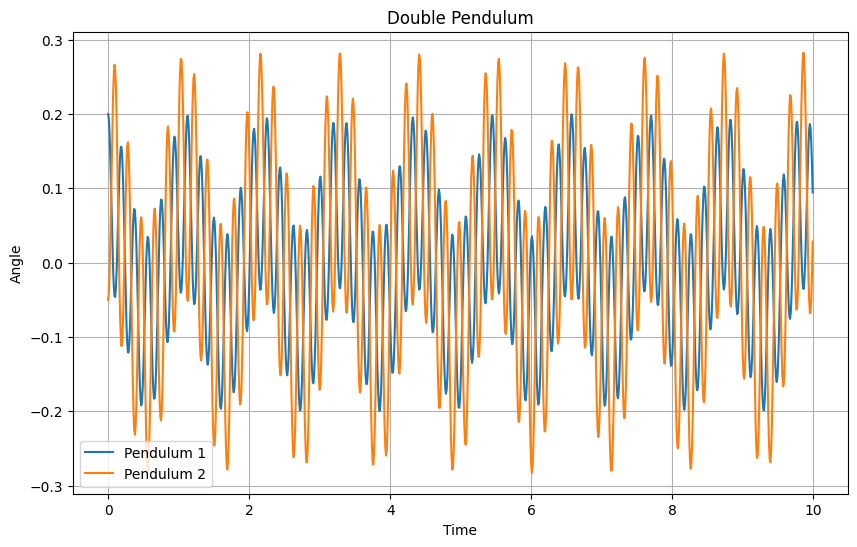

In [237]:
# Plotting the angles over time
plt.figure(figsize=(10, 6))
plt.plot(time[:1000], phi1_data[:1000], label='Pendulum 1')
plt.plot(time[:1000], phi2_data[:1000], label='Pendulum 2')
plt.title('Double Pendulum')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.legend()
plt.grid(True)
plt.show()

In [226]:
# Convert to Cartesian coordinates of the two bob positions.
x_sol_1 = l_num * np.sin(phi1_data)
y_sol_1 = -l_num * np.cos(phi1_data)
x_sol_2 = x_sol_1 + l_num * np.sin(phi2_data)
y_sol_2 = y_sol_1 - l_num* np.cos(phi2_data)

In [227]:
# Plotted bob circle radius
r = 0.02
# Plot a trail of the m2 bob's position for the last trail_secs seconds.
trail_secs = 1
# This corresponds to max_trail time points.
max_trail = int(trail_secs / dt)

0 / 300
1 / 300
2 / 300
3 / 300
4 / 300
5 / 300
6 / 300
7 / 300
8 / 300
9 / 300
10 / 300
11 / 300
12 / 300
13 / 300
14 / 300
15 / 300
16 / 300
17 / 300
18 / 300
19 / 300
20 / 300
21 / 300
22 / 300
23 / 300
24 / 300
25 / 300
26 / 300
27 / 300
28 / 300
29 / 300
30 / 300
31 / 300
32 / 300
33 / 300
34 / 300
35 / 300
36 / 300
37 / 300
38 / 300
39 / 300
40 / 300
41 / 300
42 / 300
43 / 300
44 / 300
45 / 300
46 / 300
47 / 300
48 / 300
49 / 300
50 / 300
51 / 300
52 / 300
53 / 300
54 / 300
55 / 300
56 / 300
57 / 300
58 / 300
59 / 300
60 / 300
61 / 300
62 / 300
63 / 300
64 / 300
65 / 300
66 / 300
67 / 300
68 / 300
69 / 300
70 / 300
71 / 300
72 / 300
73 / 300
74 / 300
75 / 300
76 / 300
77 / 300
78 / 300
79 / 300
80 / 300
81 / 300
82 / 300
83 / 300
84 / 300
85 / 300
86 / 300
87 / 300
88 / 300
89 / 300
90 / 300
91 / 300
92 / 300
93 / 300
94 / 300
95 / 300
96 / 300
97 / 300
98 / 300
99 / 300
100 / 300
101 / 300
102 / 300
103 / 300
104 / 300
105 / 300
106 / 300
107 / 300
108 / 300
109 / 300
110 / 300


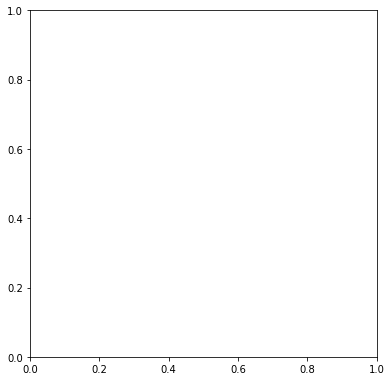

In [228]:
def make_plot(i):
    # Plot and save an image of the double pendulum configuration for time
    # point i.
    # The pendulum rods.
    ax.plot([0, x_sol_1[i], x_sol_2[i]], [0, y_sol_1[i], y_sol_2[i]], lw=2, c='k')
    # Circles representing the anchor point of rod 1, and bobs 1 and 2.
    c0 = Circle((0, 0), r/2, fc='k', zorder=10)
    c1 = Circle((x_sol_1[i], y_sol_1[i]), r, fc='b', ec='b', zorder=10)
    c2 = Circle((x_sol_2[i], y_sol_2[i]), r, fc='r', ec='r', zorder=10)
    ax.add_patch(c0)
    ax.add_patch(c1)
    ax.add_patch(c2)

    # The trail will be divided into ns segments and plotted as a fading line.
    ns = 20
    s = max_trail // ns

    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0:
            continue
        imax = imin + s + 1
        # The fading looks better if we square the fractional length along the
        # trail.
        alpha = (j/ns)**2
        ax.plot(x_sol_1[imin:imax], y_sol_1[imin:imax], c='b', solid_capstyle='butt',
                lw=2, alpha=alpha)
        ax.plot(x_sol_2[imin:imax], y_sol_2[imin:imax], c='r', solid_capstyle='butt',
                lw=2, alpha=alpha)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-l_num/4, l_num/4)
    ax.set_ylim(-2*l_num-2*r, 2*r)
    ax.set_aspect('equal', adjustable='box')
    #plt.axis('off')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.savefig('_img{:04d}.png'.format(i//di), dpi=72)
    plt.cla()


# Make an image every di time points, corresponding to a frame rate of fps
# frames per second.
# Frame rate, s-1
fps = 10
di = int(1/fps/dt)
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

for i in range(0, time.size, di):
    print(i // di, '/', time.size // di)
    make_plot(i)

In [229]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.10.23+dfsg-2.1ubuntu11.7).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [230]:
i = "*.png"
o = "animation.gif"
subprocess.call("convert -delay 10 -loop 0 " + i + " " + o, shell=True)

0

In [231]:
fname = 'animation.gif'
Image(open(fname, 'rb').read())  # local

Output hidden; open in https://colab.research.google.com to view.